In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Heart Disease.xlsx')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [3]:
df.shape

(319795, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
df.duplicated().sum()

18078

In [7]:
df.HeartDisease.value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

In [8]:
NO = (292422/(292422+319795))*100
YES =(27373/(27373+319795))*100
print(YES,NO)

7.884655267766615 47.764436466154976


# This dataset is an imbalance dataset

<Axes: xlabel='HeartDisease', ylabel='count'>

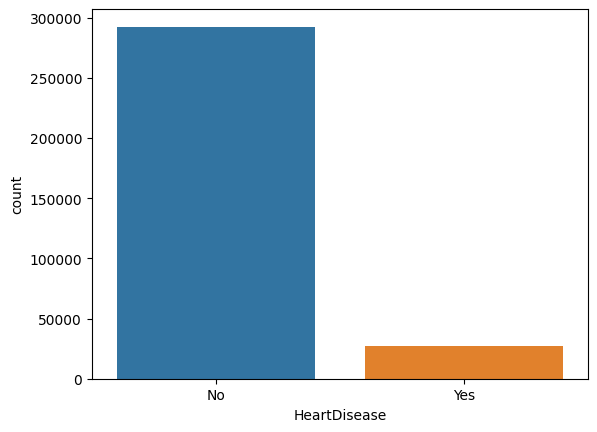

In [9]:
#CountPlot
import seaborn as sns
sns.countplot(x=df["HeartDisease"])

In [10]:
 df.corr(numeric_only = True)

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


<Axes: >

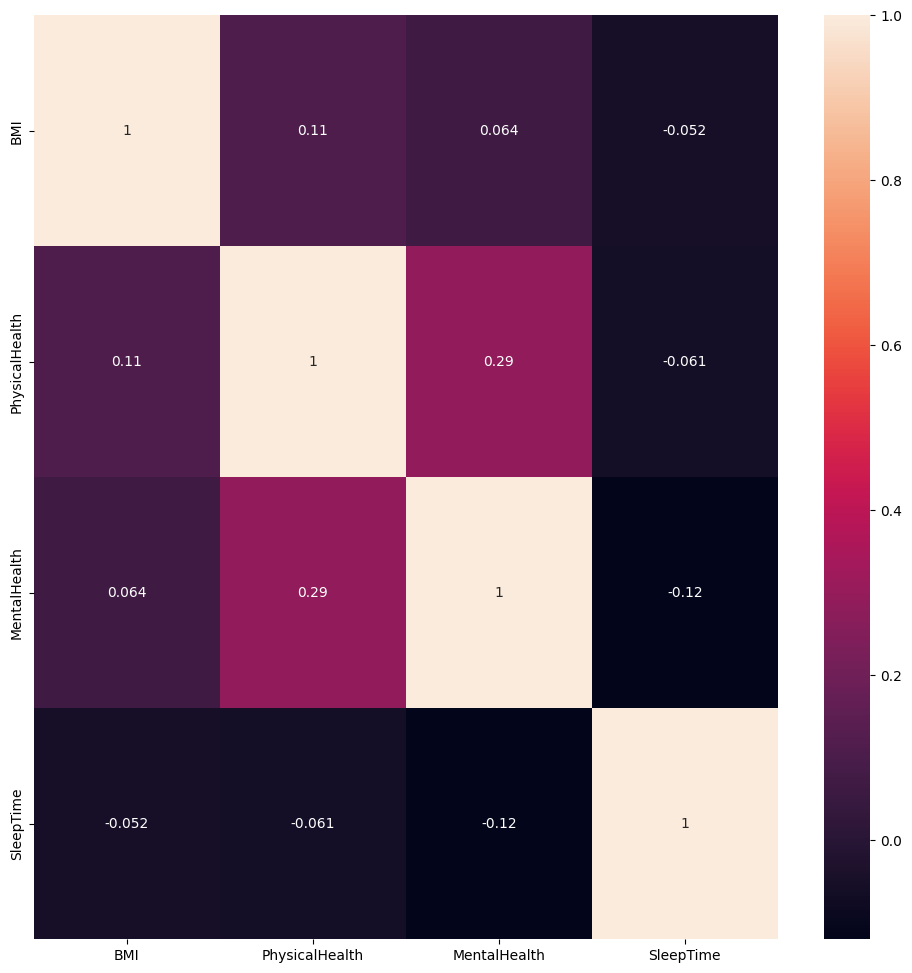

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only = True),annot=True)

<Axes: xlabel='BMI', ylabel='Count'>

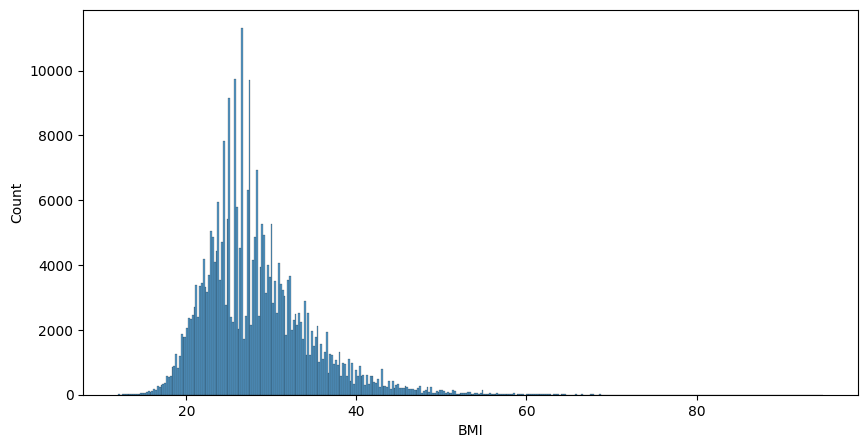

In [12]:
plt.figure(figsize = (10,5))
sns.histplot(df['BMI'])

In [13]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [14]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

# Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le = LabelEncoder()

In [16]:
for col in df.columns:
    if df[col].dtype == np.number:
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [17]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0


# Measures of Central Tendency

In [18]:
df.HeartDisease.mean()

0.08559545959130067

In [19]:
df.HeartDisease.median()

0.0

In [20]:
df.AgeCategory.mean()

6.51453587454463

In [21]:
df.AgeCategory.median()

7.0

In [22]:
x = df.drop('HeartDisease',axis=1)
x

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7,0,1,1,8,3,2,0,1,5,1,0,0
319791,29.84,1,0,0,0,0,0,1,3,3,0,1,4,4,1,0,0
319792,24.24,0,0,0,0,0,0,0,5,3,0,1,2,5,0,0,0
319793,32.81,0,0,0,0,0,0,0,1,3,0,0,2,11,0,0,0


In [23]:
x.shape

(319795, 17)

In [24]:
y= df[['HeartDisease']]
y

,HeartDisease
0,0
1,0
2,0
3,0
4,0
...,...
319790,1
319791,0
319792,0
319793,0


In [25]:
y.shape

(319795, 1)

# Synthetic Minority Oversampling Technique(SMOTE)

In [26]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=42)

In [27]:
before_sampling_y = y.value_counts() 
before_sampling_y

HeartDisease
0               292422
1                27373
Name: count, dtype: int64

In [28]:
new_x,new_y = sm.fit_resample(x,y)

In [29]:
after_sampling_y= new_y.value_counts()

In [30]:
after_sampling_y

HeartDisease
0               290220
1               290220
Name: count, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split as tts

In [32]:
xtrain,xtest,ytrain,ytest=tts(new_x,new_y,train_size=0.78,random_state=42)

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [34]:
lr_pred = lr.predict(xtest)
lr_pred

array([0, 0, 0, ..., 0, 1, 1])

In [35]:
lr_accuracy = lr.score(xtrain,ytrain)
lr_accuracy

0.7372416580709144

# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [37]:
dtc_pred = dtc.predict(xtest)
dtc_pred

array([0, 0, 0, ..., 0, 1, 1])

In [38]:
dtc_accuracy = dtc.score(xtrain,ytrain)
dtc_accuracy

0.997649880837473

# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [40]:
knn_pred = knn.predict(xtest)
knn_pred

array([1, 0, 1, ..., 0, 1, 1])

In [41]:
knn_accuracy = knn.score(xtest,ytest)
knn_accuracy

0.8523849424810294

# Random Forest 

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [43]:
rf_pred = rf.predict(xtest)
rf_pred

array([0, 0, 0, ..., 0, 1, 1])

In [44]:
rf_accuracy = rf.score(xtest,ytest)
rf_accuracy

0.8910467747871915

In [45]:
data = {'Model': ['Logistic Regression','KNN','Decision Tree','Random Forest'],
       'Accuracy':[lr_accuracy,knn_accuracy,dtc_accuracy,rf_accuracy]}
all_model_statistic = pd.DataFrame(data)
all_model_statistic

,Model,Accuracy
0,Logistic Regression,0.737242
1,KNN,0.852385
2,Decision Tree,0.997650
3,Random Forest,0.891047


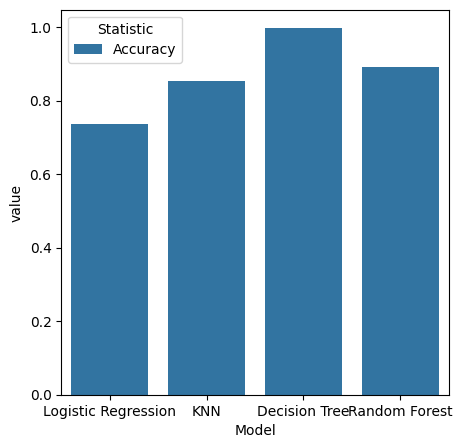

In [46]:
plt.figure(figsize = (5,5))
df2 = pd.melt(frame = all_model_statistic,id_vars ='Model',var_name = 'Statistic',value_name = 'value')
sns.barplot(data=df2,x='Model',y='value',hue = 'Statistic')
plt.show()

# Model Save

In [47]:
import pickle as pk
import joblib as jb

In [48]:
pk.dump(dtc,open("Heart","wb")) #Decision Tree model save

In [49]:
dtc2= pk.load(open("Heart","rb"))

In [50]:
dtc_model_pred = dtc2.predict([['20.54','0','0','1','0','0','0','1','9','5','0','1','0','7','0','0','1']])
dtc_model_pred

array([0])

# Confusion Matrix

In [51]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve
dtc_cm = confusion_matrix(ytest,dtc_pred)
dtc_cm

array([[53054, 10926],
       [ 7845, 55872]], dtype=int64)

# Classification-report

In [58]:
lr_classification_report = classification_report(ytest,lr_pred)
print(lr_classification_report)

              precision    recall  f1-score   support

           0       0.75      0.71      0.73     63980
           1       0.72      0.77      0.75     63717

    accuracy                           0.74    127697
   macro avg       0.74      0.74      0.74    127697
weighted avg       0.74      0.74      0.74    127697



In [59]:
knn_classification_report = classification_report(ytest,knn_pred)
print(knn_classification_report)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84     63980
           1       0.79      0.96      0.87     63717

    accuracy                           0.85    127697
   macro avg       0.87      0.85      0.85    127697
weighted avg       0.87      0.85      0.85    127697



In [60]:
dtc_classification_report = classification_report(ytest,dtc_pred)
print(dtc_classification_report)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     63980
           1       0.84      0.88      0.86     63717

    accuracy                           0.85    127697
   macro avg       0.85      0.85      0.85    127697
weighted avg       0.85      0.85      0.85    127697



In [61]:
rf_classification_report = classification_report(ytest,rf_pred)
print(rf_classification_report)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     63980
           1       0.87      0.92      0.89     63717

    accuracy                           0.89    127697
   macro avg       0.89      0.89      0.89    127697
weighted avg       0.89      0.89      0.89    127697

